<a href="https://colab.research.google.com/github/3-hWnG/My-DAP/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import random
import numpy as np
import gc
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

# **# Exercise 2.1.**


In [113]:
titanic_url = 'https://raw.githubusercontent.com/lenhattung/SP26-AI1904-DAP391m/refs/heads/main/lab_part_2/01%20-%20Linear%20and%20logistic%20regression/data/titanic.csv'
titanic = pd.read_csv(titanic_url , na_values=['?'])
pd.set_option('display.max_columns', 50)
titanic.head()

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [114]:
drop_cols = ['boat', 'body', 'home.dest', 'name', 'ticket', 'passenger_id', 'cabin']
titanic = titanic.drop(columns=drop_cols)
titanic.head()

#Xử lí = median
#Age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] =  titanic['fare'].fillna(titanic['fare'].median())

# Embarked, Sex: điền bằng giá trị xuất hiện nhiều nhất (mode)
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['sex'] = titanic['sex'].fillna(titanic['sex'].mode()[0])




In [115]:
mod = sm.GLM.from_formula(formula="survived ~ pclass + sex + age + sibsp  + embarked", data=titanic, family=sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1302
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -600.32
Date:                Sun, 18 Jan 2026   Deviance:                       1200.6
Time:                        06:39:37   Pearson chi2:                 1.33e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3382
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4349      0.366      6.651      0.000       1.717       3.152
embarked[T.Q]    -0.5412      0.297     -1.825      0.068      -1.122       0.040
embarked[T.S]    -0.6238      0.182     -3.437      0.001      -0.980      -0.268
pclass           -1.0122      0.101     -9.974      0.000      -1.211      -0.813
sex               2.6028      0.156     16.638      0.000       2.296       2.909
age              -0.0357      0.006     -5.650      0.000      -0.048      -0.023
sibsp            -0.2997      0.086     -3.502      0.000      -0.467      -0.132
=================================================================================
"""

In [116]:
X_train , X_test , y_train , y_test = train_test_split(
                                            titanic, titanic.survived , test_size=0.3, random_state = random.randint(1,1000)
                                              )
print(X_train.shape, X_test.shape)
#Train model trên X train thay vì nguyên cái data
model =  sm.GLM.from_formula(formula="survived ~ pclass + sex + age + sibsp  + embarked", data=X_train, family=sm.families.Binomial())
res = model.fit()

pred = res.predict(X_test)
roc_auc_score(y_test, pred)



(916, 8) (393, 8)


np.float64(0.8076218691085376)

In [117]:
scores = []

for k in range(250) :

    X_train, X_test, y_train, y_test = train_test_split(titanic,
                                                        titanic.survived,
                                                        stratify = titanic.survived,
                                                        test_size = 0.3,
                                                        random_state = random.randint(0, 10000))
    # print(X_train.shape, X_test.shape)
    mod = sm.GLM.from_formula(formula="survived ~ pclass + sex + age + sibsp  + embarked",
                              data = X_train,
                              family = sm.families.Binomial())
    res = mod.fit()
    res.summary()
    preds = res.predict(X_test)
    scores.append(roc_auc_score(y_test, preds))
    # print(scores[-1])

In [118]:
df = pd.DataFrame(data = scores, columns = ['scores'])
print(df.scores.describe())
print(f'Kurtosis \t %s' %round(df.scores.kurtosis(), 5)) # This one returns 'normalized' kurtosis (i.e. 0 instead of 3).
print(f'Skewness \t %s' %round(df.scores.skew(), 5))

count    250.000000
mean       0.840253
std        0.017474
min        0.794760
25%        0.827377
50%        0.841385
75%        0.852034
max        0.889383
Name: scores, dtype: float64
Kurtosis 	 -0.18468
Skewness 	 -0.02525


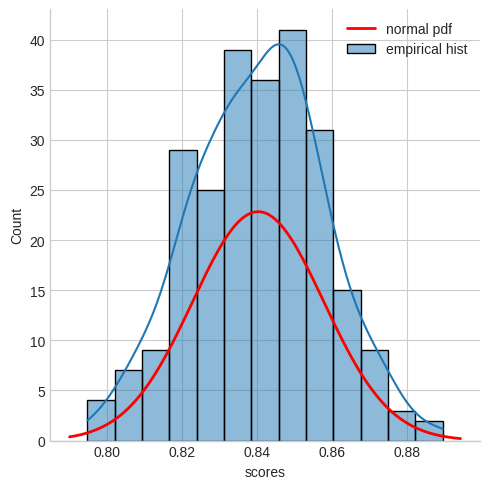

In [119]:
from scipy import stats
ax = sns.displot(data = df.scores, kde = True, label = 'empirical hist')
x0, x1 = ax.ax.get_xlim()
x_pdf = np.linspace(x0, x1, len(df))
y_pdf = stats.norm.pdf(x_pdf, df.scores.mean(), df.scores.std())
ax.ax.plot(x_pdf, y_pdf, 'r', lw = 2, label = 'normal pdf')
ax.ax.legend()

In [120]:
from scipy import stats

alpha = 1e-3

df = pd.DataFrame(data = scores, columns = ['scores'])
k2, p = stats.normaltest(df.scores) # Kurtosis and skewness normality test.

if p < alpha :

    print('Kurtosis, Skewness test: The null hypothesis about normality can be rejected.')

else:

    print('Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.')

# Kolmogorov Smirnov normality test.
ks = stats.kstest(df.scores, 'norm')

if ks[1] < alpha :

    print('Kolmogorov Smirnov test: The null hypothesis about normality can be rejected.')

else:

    print('Kolmogorov Smirnov test: The null hypothesis about normality can not be rejected.')

# Do you remember that @kstest function requires NORMALIZATION of sample?
ks = stats.kstest((df.scores - df.scores.mean()) / df.scores.std(), 'norm')

if ks[1] < alpha :

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can be rejected.')

else:

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.')

Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.
Kolmogorov Smirnov test: The null hypothesis about normality can be rejected.
Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.


In [121]:
for k in range(1, 10) :

    # Ensure y is also from the cleaned DataFrame.
    X_train, X_test, y_train, y_test = train_test_split(titanic,
                                                        titanic.survived,
                                                        test_size = 0.1 * k,
                                                        random_state = 0)
    mod = sm.GLM.from_formula(formula = "survived ~ pclass + sex + age + sibsp  + embarked",
                              data = X_train,
                              family = sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict(X_train)
    preds = res.predict(X_test)
    print("Trained AUC:", round(roc_auc_score(y_train, predsTrain), 4), "Valid AUC:", round(roc_auc_score(y_test, preds), 4))

Trained AUC: 0.847 Valid AUC: 0.8102
Trained AUC: 0.8452 Valid AUC: 0.8397
Trained AUC: 0.8461 Valid AUC: 0.8385
Trained AUC: 0.8431 Valid AUC: 0.845
Trained AUC: 0.8452 Valid AUC: 0.8408
Trained AUC: 0.8452 Valid AUC: 0.8413
Trained AUC: 0.8467 Valid AUC: 0.8379
Trained AUC: 0.8672 Valid AUC: 0.8285
Trained AUC: 0.8837 Valid AUC: 0.8288


In [127]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
kf = KFold(n_splits = 10, shuffle = True, random_state = random.randint(0, 10000))
fold = 1

print(f"fold  | auc_train  | auc_test   | acc_test")
for train_idx, test_idx in kf.split(titanic.index.values) :
    X_train_fold = titanic.iloc[train_idx]
    X_test_fold = titanic.iloc[test_idx]

    mod = sm.GLM.from_formula(formula = "survived ~ pclass + sex + age + sibsp + embarked",
                              data = X_train_fold,
                              family=sm.families.Binomial())
    res = mod.fit()
    #Dự đoán (Kết quả là xác suất P(Survived=1))
    prob_train = res.predict(X_train_fold)
    prob_test = res.predict(X_test_fold)

    # Đánh giá
    # - AUC: Dùng trực tiếp xác suất
    auc_train = roc_auc_score(X_train_fold.survived, prob_train)
    auc_test = roc_auc_score(X_test_fold.survived, prob_test)

    # - Accuracy: Phải chuyển xác suất thành nhãn 0/1 (ngưỡng 0.5)
    pred_labels_test = (prob_test > 0.5).astype(int)
    acc_test = accuracy_score(X_test_fold.survived, pred_labels_test)
    print(f"{fold:<5} | {auc_train:.4f}     | {auc_test:.4f}     | {acc_test:.4f}")
    fold += 1

fold  | auc_train  | auc_test   | acc_test
1     | 0.8450     | 0.8340     | 0.8244
2     | 0.8449     | 0.8409     | 0.7481
3     | 0.8456     | 0.8300     | 0.7939
4     | 0.8410     | 0.8692     | 0.7863
5     | 0.8458     | 0.8210     | 0.7939
6     | 0.8419     | 0.8583     | 0.7328
7     | 0.8420     | 0.8652     | 0.8092
8     | 0.8482     | 0.8098     | 0.7710
9     | 0.8449     | 0.8370     | 0.8015
10    | 0.8426     | 0.8578     | 0.8231


In [129]:
print(f'Overall percent of uninsured persons is %s' %round(titanic.survived.sum() / titanic.survived.count() * 100, 2))

Overall percent of uninsured persons is 38.2


In [134]:
from sklearn.metrics import accuracy_score

predsTrain = res.predict(X_train_fold)
preds = res.predict(X_test_fold)

# XỬ LÝ LỖI KHỚP DÒNG (QUAN TRỌNG)
# Chỉ lấy những dòng đáp án thật (survived) tương ứng với những dòng mà model đã dự đoán được
# (Tự động bỏ qua những dòng model đã vứt đi do thiếu dữ liệu)
y_train_true = X_train_fold.survived.loc[predsTrain.index]
y_test_true = X_test_fold.survived.loc[preds.index]

# Tính Accuracy
# Train
acc_train = accuracy_score(y_train_true, (predsTrain > 0.5).astype(int)) * 100
print(f'Quality score for training set is {round(acc_train, 2)}%')

# Test
acc_test = accuracy_score(y_test_true, (preds > 0.5).astype(int)) * 100
print(f'Quality score for test set is {round(acc_test, 2)}%')

Quality score for training set is 78.88%
Quality score for test set is 82.31%


# **# Exercise 2.2**

In [138]:
wine_url = 'https://raw.githubusercontent.com/lenhattung/SP26-AI1904-DAP391m/refs/heads/main/lab_part_2/01%20-%20Linear%20and%20logistic%20regression/wines.csv'
wine = pd.read_csv(wine_url)
print(wine.shape)
wine.head()

(6497, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


In [144]:
mod = sm.GLM.from_formula(formula="quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", data=wine, family=sm.families.Binomial())
res = mod.fit()
display(res.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6485
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sun, 18 Jan 2026   Deviance:                   2.3907e+06
Time:                        06:57:48   Pearson chi2:                 7.02e+20
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.711e+17   1.09e+09   3.42e+08      0.000    3.71e+17    3.71e+17
fixed_acidity         4.572e+14   1.42e+06   3.22e+08      0.000    4.57e+14    4.57e+14
volatile_acidity      -8.97e+15   7.06e+06  -1.27e+09      0.000   -8.97e+15   -8.97e+15
citric_acid          -7.408e+14   7.27e+06  -1.02e+08      0.000   -7.41e+14   -7.41e+14
residual_sugar        2.943e+14   4.71e+05   6.25e+08      0.000    2.94e+14    2.94e+14
chlorides            -3.268e+15   3.04e+07  -1.08e+08      0.000   -3.27e+15   -3.27e+15
free_sulfur_dioxide   4.033e+13   6.86e+04   5.88e+08      0.000    4.03e+13    4.03e+13
total_sulfur_dioxide -1.676e+13   2.52e+04  -6.64e+08      0.000   -1.68e+13   -1.68e+13
density              -3.713e+17   1.11e+09  -3.35e+08      0.000   -3.71e+17   -3.71e+17
pH                    2.968e+15   8.25e+06    3.6e+08      0.000    2.97e+15    2.97e+15
sulphates              5.19e+15   6.95e+06   7.47e+08      0.000    5.19e+15    5.19e+15
alcohol               1.804e+15   1.53e+06   1.18e+09      0.000     1.8e+15     1.8e+15
========================================================================================
"""

In [146]:
display(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


None

In [156]:
wine_clean = wine.dropna()

print("Kích thước sau khi xóa:", wine_clean.shape)
wine_clean.quality.value_counts()

Kích thước sau khi xóa: (6497, 13)


,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [154]:
from sklearn.metrics import mean_squared_error

#Target quality
X_train, X_test, y_train, y_test = train_test_split(wine_clean,
                                                    wine_clean.quality,
                                                    test_size = 0.3,
                                                    random_state = random.randint(0, 1000))
print(X_train.shape, X_test.shape)
# Train the model on the training data (X_train) using Gaussian family for regression
mod = sm.GLM.from_formula(formula="quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", data=X_train, family=sm.families.Gaussian()) # Model now predicts 'quality'
res = mod.fit()
preds = res.predict(X_test)

mse = mean_squared_error(y_test, preds)
print(mse)

(4547, 13) (1950, 13)
0.511295435710704


In [164]:
scores = []

for k in range(199) :

    X_train, X_test, y_train, y_test = train_test_split(wine_clean,
                                                        wine_clean.quality, # Use the original 'quality' as target
                                                        # Remove stratify as it's for classification
                                                        test_size = 0.3,
                                                        random_state = random.randint(0, 10000))
    # print(X_train.shape, X_test.shape)
    mod = sm.GLM.from_formula(formula="quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", # Correct formula for wines dataset
                              data = X_train,
                              family = sm.families.Gaussian()) # Use Gaussian family for regression
    res = mod.fit()
    preds = res.predict(X_test)
    scores.append(mean_squared_error(y_test, preds)) # Use mean_squared_error for regression
    # print(scores[-1])

In [165]:
df = pd.DataFrame(data = scores, columns = ['scores'])
print(df.scores.describe())
print(f'Kurtosis \t %s' %round(df.scores.kurtosis(), 5)) # This one returns 'normalized' kurtosis (i.e. 0 instead of 3).
print(f'Skewness \t %s' %round(df.scores.skew(), 5))

count    199.000000
mean       0.541596
std        0.017363
min        0.493418
25%        0.529235
50%        0.541586
75%        0.552516
max        0.584969
Name: scores, dtype: float64
Kurtosis 	 -0.05196
Skewness 	 0.13717


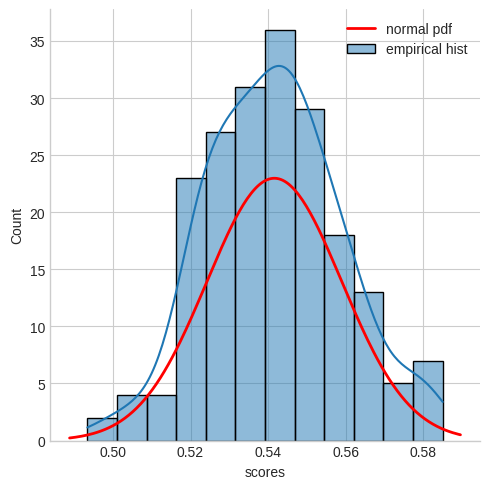

In [166]:
#Visualize
ax = sns.displot(data = df.scores, kde = True, label = 'empirical hist')
x0, x1 = ax.ax.get_xlim()
x_pdf = np.linspace(x0, x1, len(df))
y_pdf = stats.norm.pdf(x_pdf, df.scores.mean(), df.scores.std())
ax.ax.plot(x_pdf, y_pdf, 'r', lw = 2, label = 'normal pdf')
ax.ax.legend()

In [167]:
# Re-creating df assuming 'scores' list is available from previous execution
df = pd.DataFrame(data = scores, columns = ['scores'])

alpha = 1e-3

k2, p = stats.normaltest(df.scores) # Kurtosis and skewness normality test.

if p < alpha :

    print('Kurtosis, Skewness test: The null hypothesis about normality can be rejected.')

else:

    print('Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.')

# Kolmogorov Smirnov normality test.
# Note: kstest expects a standard normal distribution for 'norm' argument,
# so the sample should be normalized.
ks = stats.kstest((df.scores - df.scores.mean()) / df.scores.std(), 'norm')

if ks[1] < alpha :

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can be rejected.')

else:

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.')

Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.
Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.


In [174]:
for k in range(1, 10) :

    # Use the cleaned wines_cleaned DataFrame and quality as target
    X_train, X_test, y_train, y_test = train_test_split(wine_clean,
                                                        wine_clean.quality,
                                                        test_size = 0.1 * k,
                                                        random_state = 0)
    mod = sm.GLM.from_formula(formula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol",
                              data = X_train,
                              family = sm.families.Gaussian()) # Use Gaussian family for regression
    res = mod.fit()
    predsTrain = res.predict(X_train)
    preds = res.predict(X_test)
    print("Train MSE:", round(mean_squared_error(y_train, predsTrain), 4), "Valid MSE:", round(mean_squared_error(y_test, preds), 4)) # Use MSE for evaluation

Train MSE: 0.5386 Valid MSE: 0.5507
Train MSE: 0.5377 Valid MSE: 0.5483
Train MSE: 0.5345 Valid MSE: 0.5526
Train MSE: 0.5155 Valid MSE: 0.5787
Train MSE: 0.5073 Valid MSE: 0.5759
Train MSE: 0.5075 Valid MSE: 0.5674
Train MSE: 0.5004 Valid MSE: 0.5628
Train MSE: 0.4999 Valid MSE: 0.5582
Train MSE: 0.5372 Valid MSE: 0.5653


In [179]:
formula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"
formula_wine = formula
for z in range(10):
    trainRes = []
    valRes = []
    # Tạo KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = random.randint(0, 10000))

    # Vòng lặp trong: Chạy qua từng fold (9 train, 1 test)
    for train_idx, test_idx in kf.split(wine_clean.index.values):
        # Cắt dữ liệu dựa trên index
        X_train_fold = wine_clean.iloc[train_idx]
        X_test_fold = wine_clean.iloc[test_idx]

        # Train model dungf gauss
        mod = sm.GLM.from_formula(formula = formula_wine,
                                  data = X_train_fold,
                                  family = sm.families.Gaussian())
        res = mod.fit()
        # Dự đoán
        predsTrain = res.predict(X_train_fold)
        preds = res.predict(X_test_fold)

        # Tính MSEvà lưu vào list
        trainRes.append(mean_squared_error(X_train_fold.quality, predsTrain))
        valRes.append(mean_squared_error(X_test_fold.quality, preds))

    # In kết quả của từng lần chạy
    print(f"{z+1:2d} | Train MSE: {np.mean(trainRes):.4f} | Valid MSE: {np.mean(valRes):.4f}")

 1 | Train MSE: 0.5396 | Valid MSE: 0.5416
 2 | Train MSE: 0.5396 | Valid MSE: 0.5423
 3 | Train MSE: 0.5396 | Valid MSE: 0.5428
 4 | Train MSE: 0.5396 | Valid MSE: 0.5427
 5 | Train MSE: 0.5396 | Valid MSE: 0.5420
 6 | Train MSE: 0.5396 | Valid MSE: 0.5420
 7 | Train MSE: 0.5396 | Valid MSE: 0.5425
 8 | Train MSE: 0.5396 | Valid MSE: 0.5423
 9 | Train MSE: 0.5396 | Valid MSE: 0.5425
10 | Train MSE: 0.5396 | Valid MSE: 0.5424


In [193]:
pred_labels_train = predsTrain.round()
pred_labels_test = preds.round()

#  Tính Accuracy (Quality Score)
# Use the target variables corresponding to the predictions from the last fold
acc_train = accuracy_score(X_train_fold.quality, pred_labels_train) * 100
acc_test = accuracy_score(X_test_fold.quality, pred_labels_test) * 100

print(f'Quality score (Accuracy) for training set is {round(acc_train, 2)}%')
print(f'Quality score (Accuracy) for test set is {round(acc_test, 2)}%')

#(Mở rộng) Kiểm tra sai số chấp nhận được (+/- 1 điểm)
# Vì rượu ngon 6 điểm mà máy đoán 5 hoặc 7 thì vẫn chấp nhận được
# Đây là cách đánh giá thực tế hơn cho bài toán Wine
train_tolerance = np.mean(abs(predsTrain - X_train_fold.quality) <= 1) * 100
test_tolerance = np.mean(abs(preds - X_test_fold.quality) <= 1) * 100

print("-" * 30)
print(f"Strict Accuracy (Trúng phóc):       Train {round(acc_train, 2)}% | Test {round(acc_test, 2)}%")
print(f"Tolerance Accuracy (Sai số +/- 1): Train {round(train_tolerance, 2)}% | Test {round(test_tolerance, 2)}%")

Quality score (Accuracy) for training set is 52.86%
Quality score (Accuracy) for test set is 55.32%
------------------------------
Strict Accuracy (Trúng phóc):       Train 52.86% | Test 55.32%
Tolerance Accuracy (Sai số +/- 1): Train 85.21% | Test 85.82%
